In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import pandas as pd

import matplotlib

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


sns.set_style('darkgrid')

from ipywidgets import *
from IPython.display import display

In [3]:
def generate_points(n=5, noise=10):
    x = np.cumsum(np.random.gamma(9, 0.5, size=n))
    y = (x+np.random.normal(0,noise,size=n))+np.random.normal(0,noise)
    return x, y

In [4]:
generate_points()

(array([  3.38017546,  10.16323565,  15.95936327,  21.01193638,  25.4855231 ]),
 array([  3.74920077,  20.50050841,   0.41808287,  28.23172663,   2.34056479]))

In [10]:
def plot_regression(x, y, b0, b1, pmin, pmax):

    fig = plt.figure(figsize=(5,5))
    
    ax = fig.gca()

    ax.set_xlim([pmin, pmax])
    ax.set_ylim([pmin, pmax])
        
    yhat = b0 + b1*x
    
    ax.scatter(x, y, s=70, color='steelblue')
    ax.scatter(x, yhat, s=70, color='darkred')
    ax.plot([pmin, pmax], [b0+b1*pmin, b0+b1*pmax], color='darkred', lw=2, alpha=0.5)
    ax.axvline(0, lw=2, c='black', linestyle='dashed')
    ax.axhline(0, lw=2, c='black', linestyle='dashed')
    
    for x_, y_, yh_ in zip(x, y, yhat):
        
        y1 = np.minimum(y_, yh_)
        y2 = np.maximum(y_, yh_)
        yr = np.ptp([y_, yh_])
        ax.plot([x_, x_+yr], [y1, y1], color='darkred', linestyle='dotted', linewidth=1.5)
        ax.plot([x_, x_+yr], [y2, y2], color='darkred', linestyle='dotted', linewidth=1.5)
        ax.plot([x_, x_], [y1, y2], color='darkred', linestyle='dotted', linewidth=1.5)
        ax.plot([x_+yr, x_+yr], [y1, y2], color='darkred', linestyle='dotted', linewidth=1.5)

    #ss = np.sum([np.ptp([y_, yh_])**2 for y_, yh_ in zip(y, yhat)])
#     xbars = np.arange(len(x))
#     sqs = [np.ptp([y_, yh_])**2 for y_, yh_ in zip(y, yhat)]
#     ss = np.sum(sqs)
#     ax2.bar(xbars, sqs, align='center', color='darkred')
#     ax2.set_xticks(xbars)
#     labels = ['y'+str(i) for i in range(1, len(x)+1)]
#     ax2.set_xticklabels(labels)
    
    plt.tight_layout()
    
    fig.show()


In [15]:
def plot_delegator(intercept, beta1):
    
    plot_regression(x, y, intercept, beta1, pmin, pmax)
    

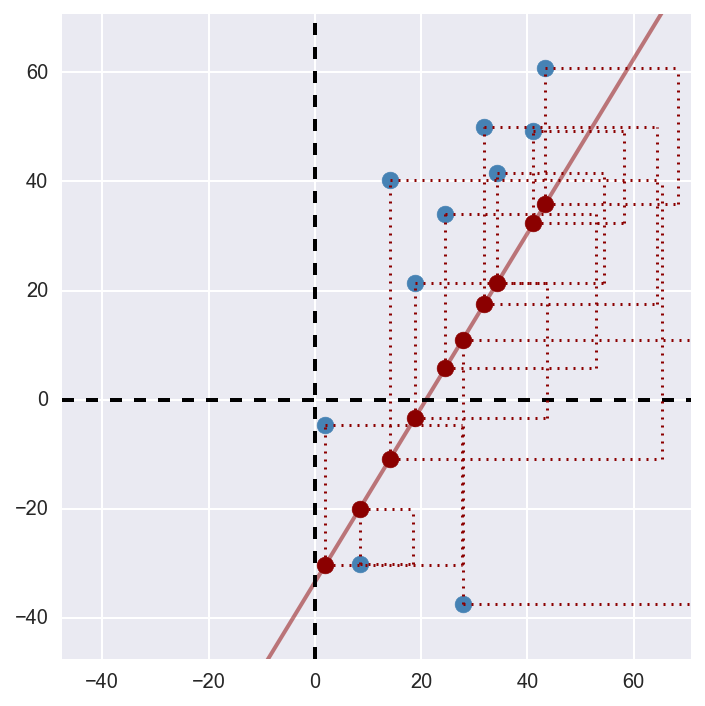

In [17]:
x, y = generate_points(n=10, noise=25)

pmax = np.maximum(np.max(y), np.max(x))+10
pmin = np.minimum(np.min(y), np.min(x))-10

interact(plot_delegator,
         intercept=widgets.FloatSlider(min=np.min(y)-30, max=np.max(y)+10, 
                                       step=0.25, value=0, continuous_update=True),
         beta1=widgets.FloatSlider(min=-1, max=4.5, 
                                   step=0.1, value=1, continuous_update=True))
       

In [15]:
ax = axarr[0]

In [16]:
ax.collections

[]